# Module 3: Plotting your Data
## How to Graph in RStudio
## Hawken Hass
## University of North Carolina Wilmington

# Creating Plots
Plots are visual representations of your data and are an essential component of data analysis. Plots are often used to display results, but are also important in A priori analyses such as identifying potential outliers and checking assumptions. In this module we will walk through creating a wide variety of different plots using Rstudio. To get started you will need to install and/or activate a package called "ggplot2"

If you are unfamiliar with installing and activating packages in R, please refer to the previous module labeled "Getting Started in R".

In [ ]:
library(ggplot2)

Creating plots in R involves first creating a plot object which is the base layer of your graph. Each type of graph will have involve different code that will create the plot object for that specific graph. The plot object involves defining your data and what specific variables you will use in your graph. These are also called "aesthetics". To make different graphs we are going to be using a dataset called "Zoo". First, I am going to import the data.

In [51]:
zoo_data<-read.table("zoo.txt")

With the ggplot package, R has many options of different types of graphs. Let's start with the basics.

# Histogram
The first thing to do when making any graph in R is to create a base layer. When you run this code you will get no output. This is normal, it is essential your canvas to create your graph on top of. Once you make this layer you can start adding your aesthetics.

Below you see the code to create the base layer. Be sure to use your outcome variable (or dependent variable) as your variable of interest. A histogram will graph frequencies of any of your variables. I am going to use the "zoo_data" data file I just imported.

In [22]:
histogram_legs<-ggplot(zoo_data, aes(Legs))+theme(legend.position = "none", plot.title = element_text(size=18))

Input your data file name and then your dependent variable of interest after "aes". The rest of the code just involves whether or not you want a legend and the size of your text.

Below is your graphical layer. This will actually add the elements of your graph to the canvas. These are elements such as your titles, the thickness of your bars (binwidth), and the color of your bars.

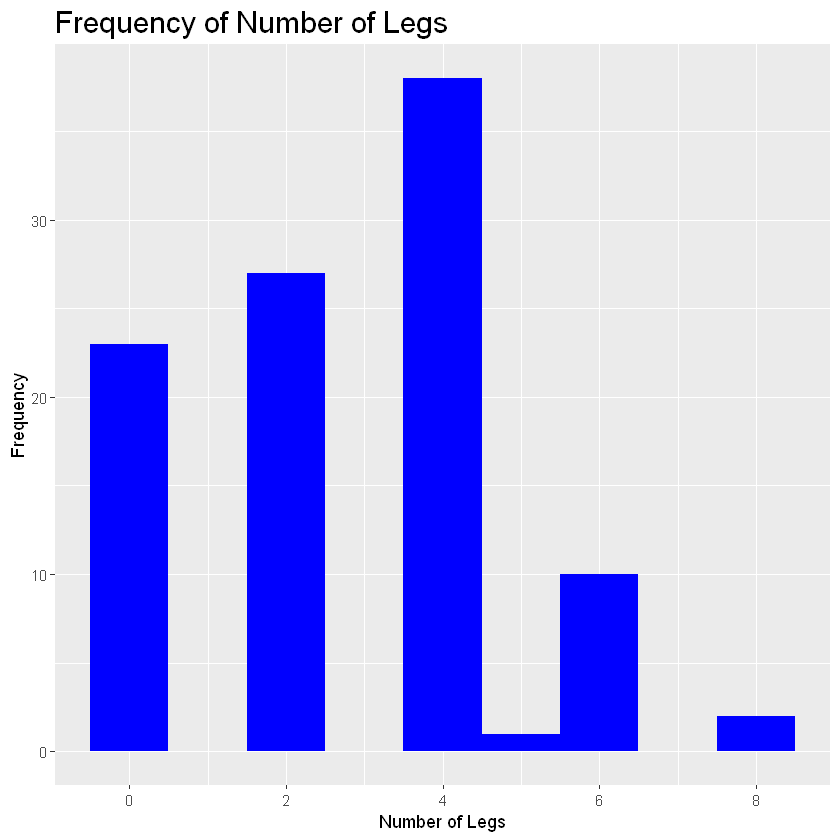

In [45]:
histogram_legs+geom_histogram(binwidth=1, fill="blue") +
labs(title = "Frequency of Number of Legs", x="Number of Legs", y="Frequency")+scale_x_continuous(breaks=c(0,2,4,6,8))

- **binwidth** - the width of each bar
- **aes** - aesthetics
- **fill** - what color you want your bars to be
- **scale_x_continuous(breaks=c()** - The range of values you want your x values to be

As we can see, most animals in this zoo have four legs since that bar is the tallest. Lets say we want to group this histogram by animal type. In this case you would add the code: + facet_wrap(sorting variable). In the parentheses add the variable you want to group the histogram by.

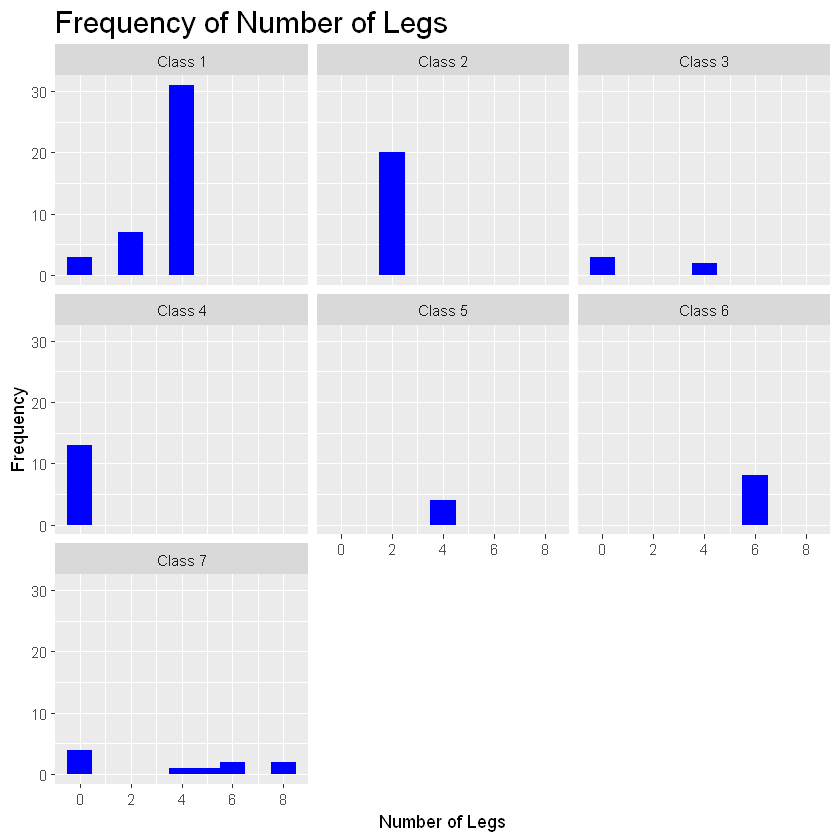

In [47]:
histogram_legs+geom_histogram(binwidth=1, fill="blue") + 
labs(title = "Frequency of Number of Legs", x="Number of Legs", y="Frequency") + 
scale_x_continuous(breaks=c(0,2,4,6,8))+facet_wrap(zoo_data$Type)

You can use the facet_wrap function on any type of graph to group your plots via a specific variable within your data set. 

# Boxplot
A boxplot is helpful for looking at the range of your data. You can see the median, your inter-quartile ranges, and any potential outliers. We will make a boxplot using the same basic process of creating a plot object and then adding graphical layers. 

In [52]:
zoo_data$Type<-factor(zoo_data$Type, levels=c(1:7),
labels=c("Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7"))

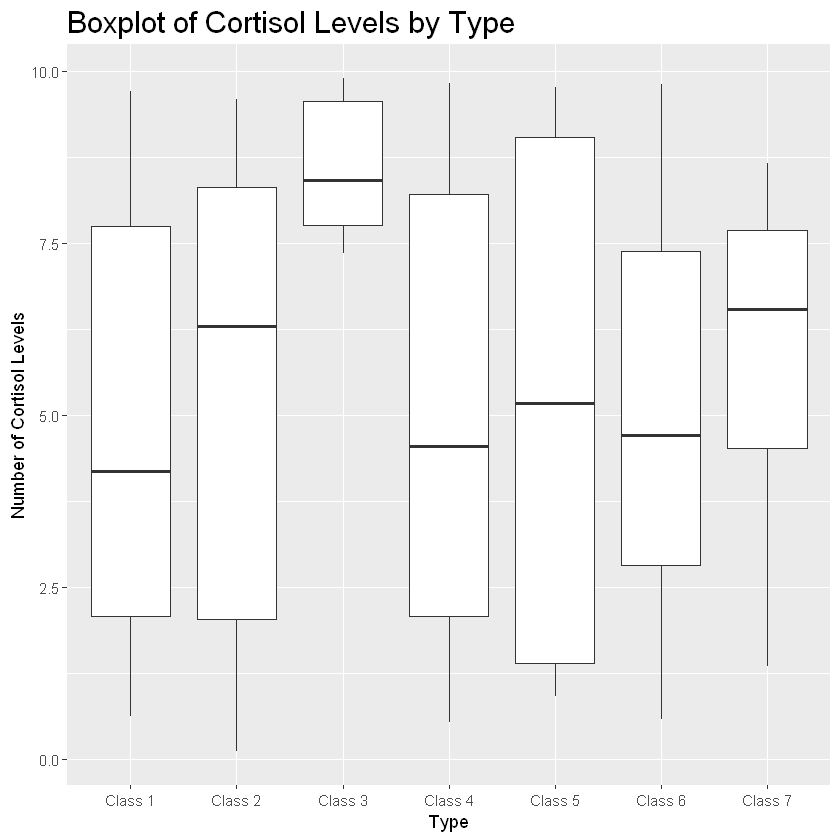

In [53]:
boxplot_cort<- ggplot(zoo_data, aes(Type, Cortisol_Levels))+theme(legend.position="none", plot.title=element_text(size=18))
boxplot_cort+geom_boxplot()+labs(title="Boxplot of Cortisol Levels by Type", x="Type", y="Number of Cortisol Levels")

This boxplot provides a breakdown of the ranges of cortisol levels for each animal class. Let's break this down. The bold line represents the median (or 50th percentile) value for that group. The white boxes represent the interquartile range. The bottom of the box shows the 25th percentile value and the top of the top of the box shows the 75th percentile value. Solid dots show any potential outliers while the lines coming from the top and bottom of the box represent the max and min, respectively. 

If a box is long with a wide range, that means the data has a lot of variability. 

If you want to further break the plot down by another variable, you can use the "color" argument when defining your aesthetics. See what happens we set color equal to factor(Legs).

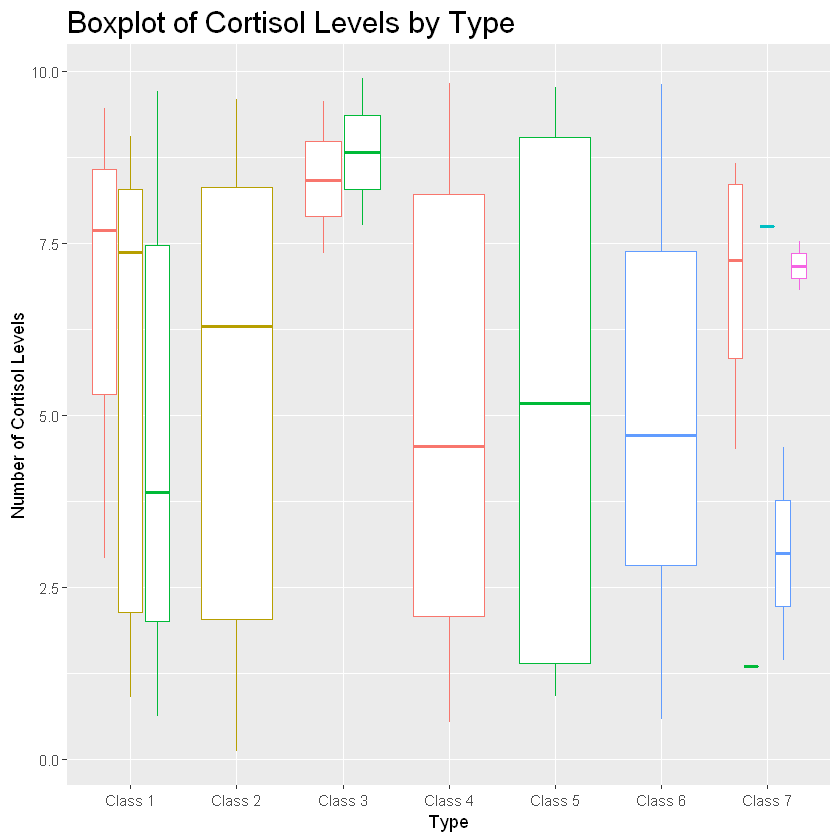

In [30]:
boxplot_cort+geom_boxplot(aes(color=factor(Legs))) + 
labs(title="Boxplot of Cortisol Levels by Type", x="Type", y="Number of Cortisol Levels")

This grouped the different classes and their cortisol levels by how many legs they have. Probably not useful information but certainly shows the power of ggplot!

# Bar Graphs

Next, is a bar graph! Bar plots are helpful for demonstrating mean differences and variability of your data through error bars. In the following code, I will be showing you how to create a barchart to show differences in stress hormones for animals in an enriched vs. nonenriched environment.

In [31]:
cort_enrichment_dat<-read.table("Enrichment_Cortisol_Dat")
cort_enrichment_dat$Group<-factor(cort_enrichment_dat$Group, levels=c(0:1), labels=c("Enrichment", "No Enrichment"))
print(cort_enrichment_dat)

          Group Mean_Cortisol Stdev
1    Enrichment          2.78  1.27
2 No Enrichment          8.18  1.16


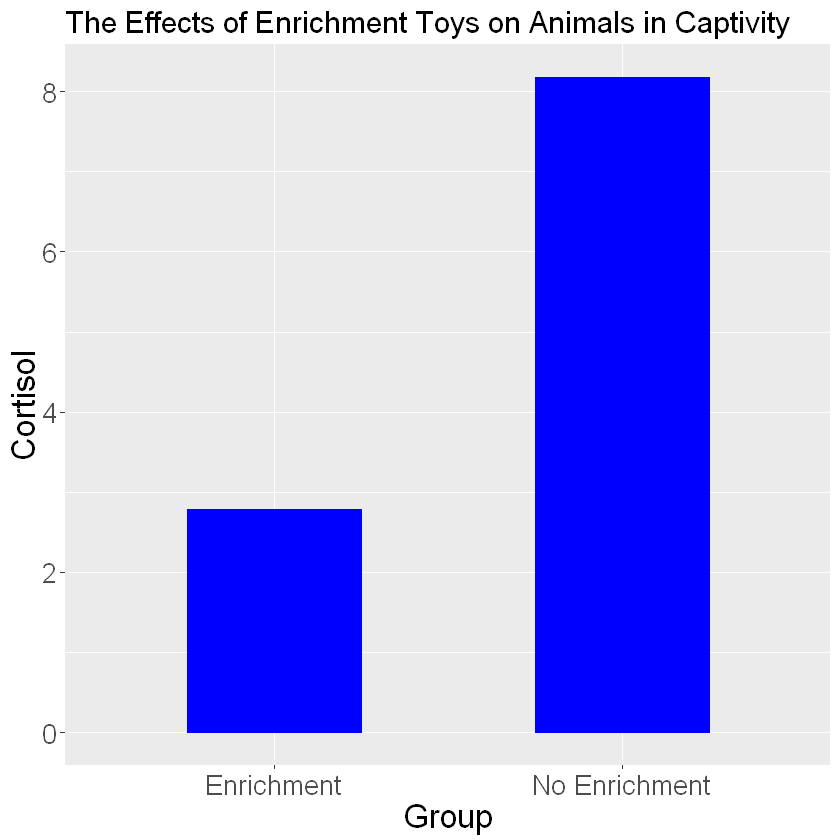

In [57]:
barplot_cortisol_by_enrichment<- ggplot(cort_enrichment_dat, 
aes(Group, Mean_Cortisol))+theme(legend.position="none", plot.title=element_text(size=18))
barplot_cortisol_by_enrichment+geom_bar(stat="identity", color="blue", fill="blue", width=.5) + 
labs(title="The Effects of Enrichment Toys on Animals in Captivity", x="Group", y="Cortisol") + 
theme(text=element_text(size=20))

Interesting! It looks like animals in an enriched environment show lower mean stress levels. The plot is missing a key important feature: error bars. Error bars use the standard deviations of the groups to show how much variability is in the data. In order to add error bars you will need a separate column of data that lists your standard deviations for each group. Then add the following code to your ggplot code:

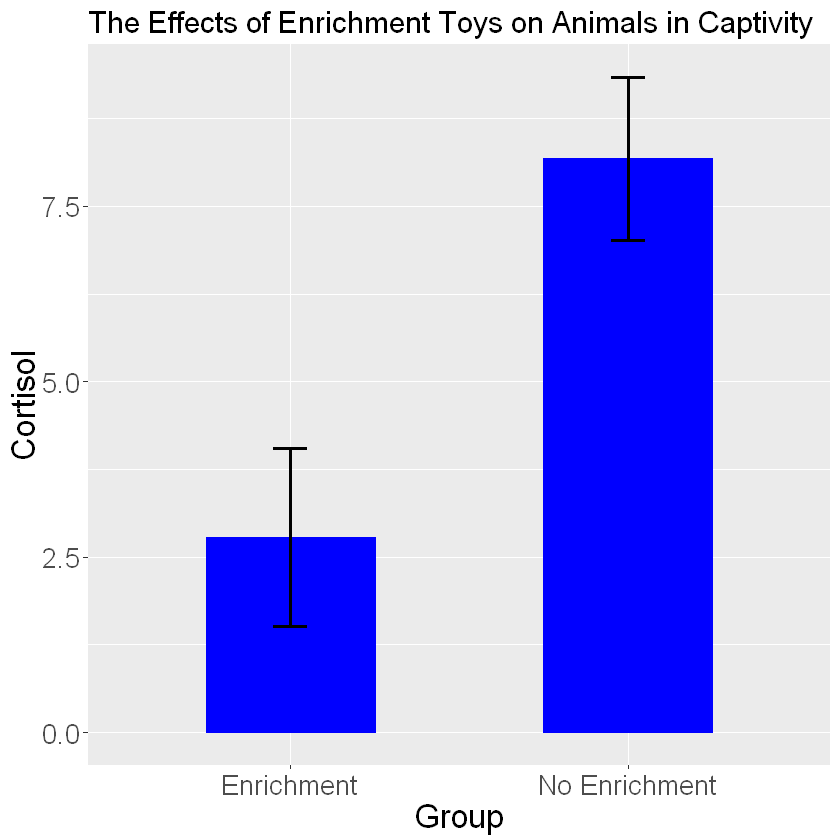

In [33]:
barplot_cortisol_by_enrichment+geom_bar(stat="identity", color="blue", fill="blue", width=.5) + 
labs(title="The Effects of Enrichment Toys on Animals in Captivity", x="Group", y="Cortisol") + 
theme(text=element_text(size=20))+geom_errorbar(aes(ymin=Mean_Cortisol-Stdev, ymax=Mean_Cortisol+Stdev,width=.1), size=1)

Using the geom_errorbar() function we can add error bars. Inside the error bars you must define the max and min values for your error bar. The min value is typically calculated as one standard deviation below the mean (mean-sd) and the max value is one standard deviation above the mean (mean+sd). You can change the thickness of the bars and width of the error bars using the size and width arguments. 

Let's make another bar graph looking at cortisol levels for each class of animal.

In [34]:
cortisol_level_dat<-read.table("Cortisol_Level_Dat")
print(cortisol_level_dat)
as.factor(cortisol_level_dat$Type)

     Type Mean_Cort Stdev_Type
1 Class 1      5.09       3.29
2 Class 2      5.46       3.10
3 Class 3      7.40       1.11
4 Class 4      4.77       1.99
5 Class 5      4.39       2.69
6 Class 6      4.63       2.87
7 Class 7      5.57       2.92


[1] Class 1 Class 2 Class 3 Class 4 Class 5 Class 6 Class 7
Levels: Class 1 Class 2 Class 3 Class 4 Class 5 Class 6 Class 7

In [60]:
barplot_cortisol_by_group<- ggplot(cortisol_level_dat, aes(Type, Mean_Cort, fill=Type)) + 
theme(legend.position="none",plot.title=element_text(size=18))

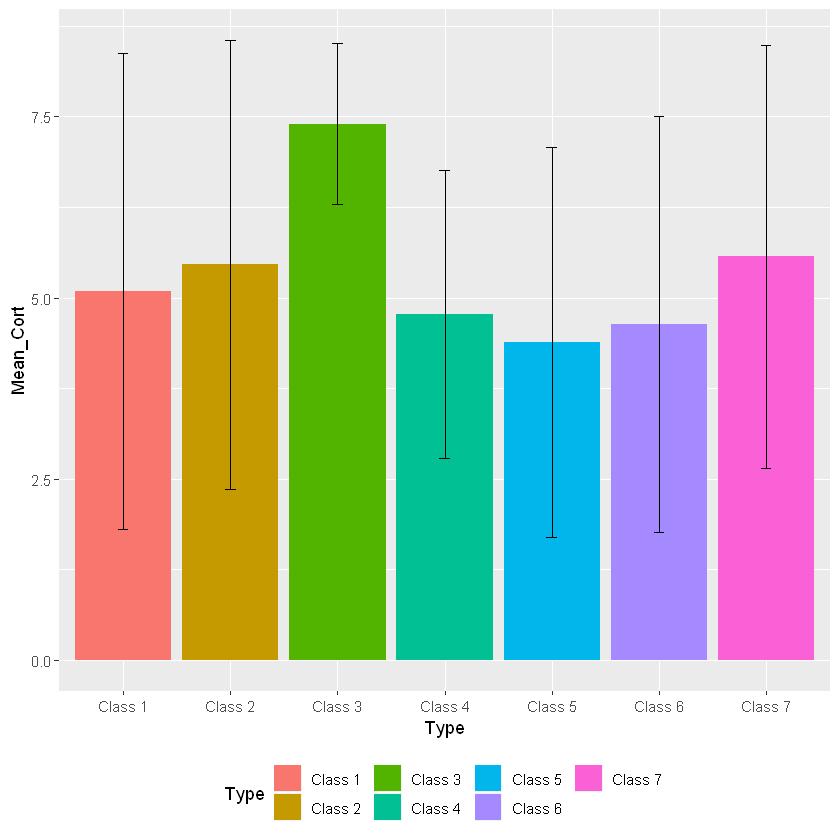

In [59]:
barplot_cortisol_by_group+geom_bar(stat="identity") + 
geom_errorbar(aes(ymin=Mean_Cort-Stdev_Type, ymax=Mean_Cort+Stdev_Type, width=.1))

Clearly, there is a lot of variability in this dataset as the error bars are very wide. Remember, in order to assign different colors to the different classes you will need to set fill equal to your grouping variable when you are setting the aesthetics. Since there are many different colors a legend would be helpful in this case! The following code allows you to add a legend to your graph:

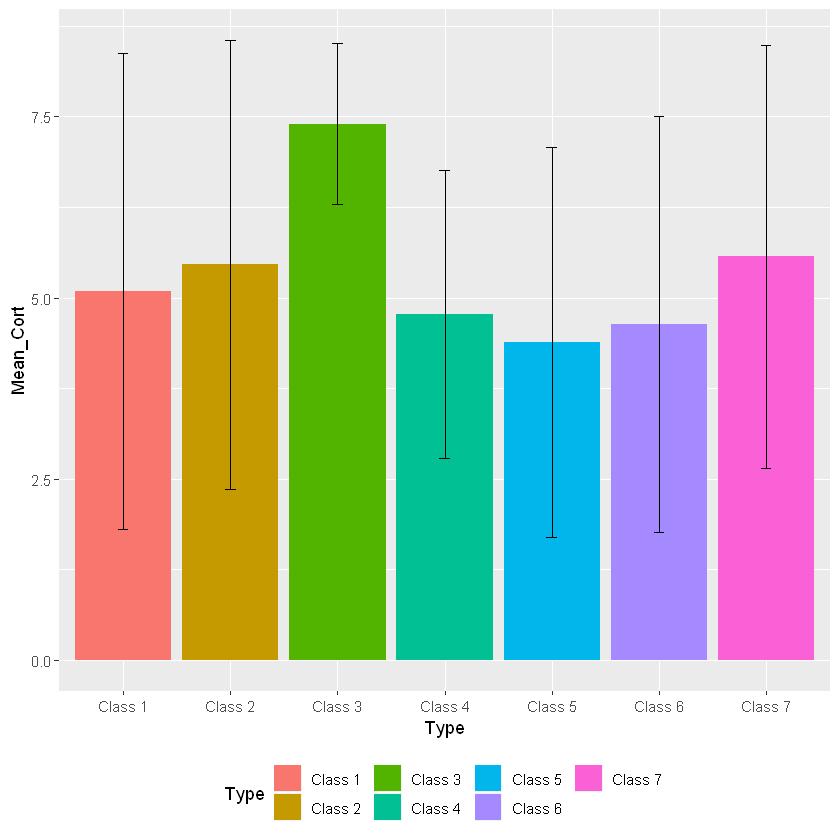

In [58]:
barplot_cortisol_by_group<- ggplot(cortisol_level_dat, aes(Type, Mean_Cort, fill=Type)) + 
theme(legend.position="bottom",plot.title=element_text(size=18))
barplot_cortisol_by_group+geom_bar(stat="identity") + 
geom_errorbar(aes(ymin=Mean_Cort-Stdev_Type, ymax=Mean_Cort+Stdev_Type, width=.1))

In this case we are changing the "legend.position" argument from "none" to "bottom". This argument can put the legend anywhere on the plot. You can also delete the legend.position argument in the code as the default is going to place the legend on the right side of the graph. 

# Line Graphs
Line graphs are helpful for showing change in data over time. In our example we will use a line plot to show changes in cortisol levels in animals. 

In [38]:
Cortisol_By_Day<-read.table("Cortisol_By_Day")

In [39]:
Cortisol_By_Day$Week<-factor(Cortisol_By_Day$Week, levels=c(1:4), labels=c("Week 1", "Week 2", "Week 3", "Week 4"))
Cortisol_By_Day$Enrichment<-factor(Cortisol_By_Day$Enrichment, levels=c(0:1), labels=c("No Enrichment", "Enrichment"))

In [41]:
line_cortisol_by_day<-ggplot(Cortisol_By_Day, aes(Time, mean_cort_by_day))+theme(plot.title=element_text(size=18))

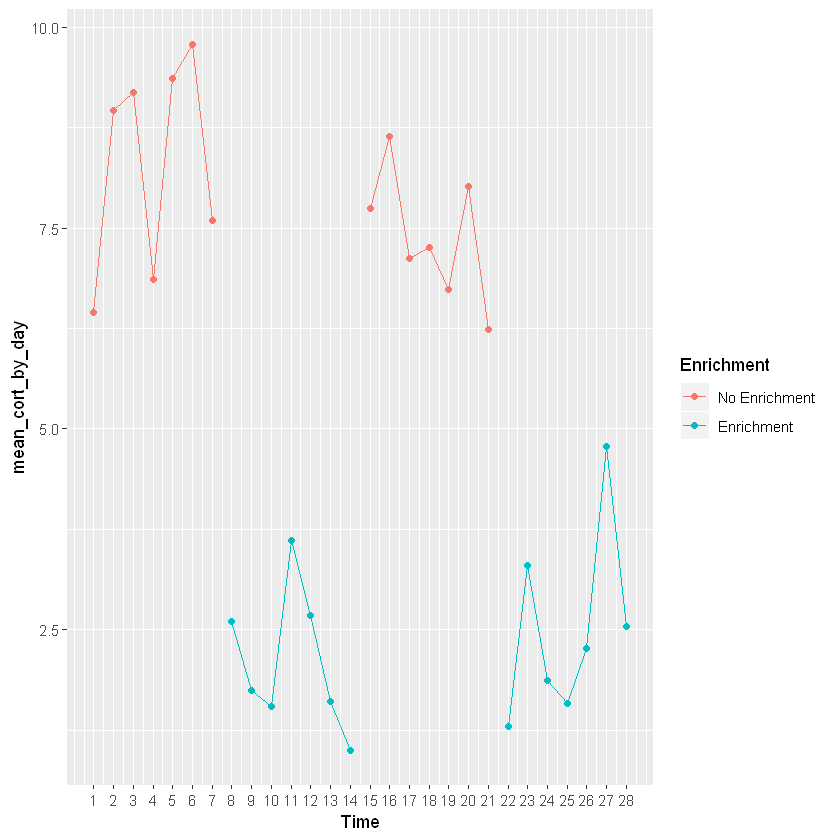

In [61]:
line_cortisol_by_day+geom_point(aes(group=Week, color=Enrichment)) + 
geom_line(aes(group=Week, color=Enrichment)) + 
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28))

Don't forget your error bars!

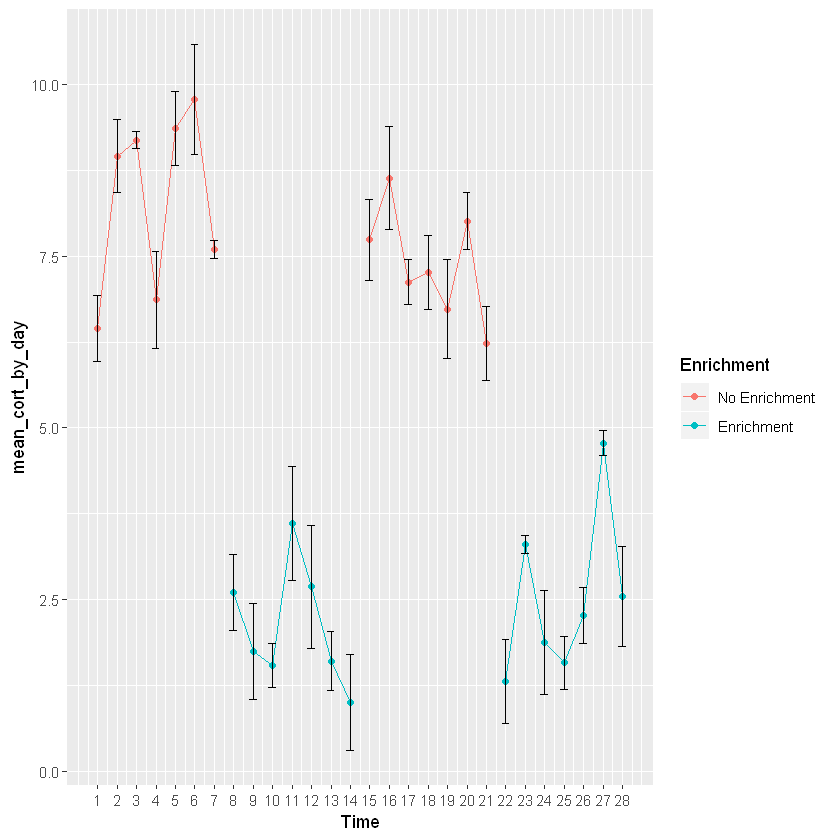

In [62]:
line_cortisol_by_day+geom_point(aes(group=Week, color=Enrichment)) + 
geom_line(aes(group=Week, color=Enrichment)) + 
scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28)) + 
geom_errorbar(aes(ymin=mean_cort_by_day-stdv_by_day, ymax=mean_cort_by_day+stdv_by_day, width=.4))

This graph is going to show changes in mean cortisol levels over time for a particular animal switching between an enriched and non-enriched environment. This shows that mean cortisol levels are higher when the animal is not in an enriched environment. This graph is providing the same information as the bar graph, but is plotted across time to see enrichment levels for each day. In order to add colors you will need to once againd define the aesthetics (specifically color) of geom_point and geom_line.

# Conclusions

Clearly, there a wide variety of different graphs you can make using R. GGplot offers a wide selection of customizable options so you can portray your data in the way you best see fit. In the next module, I will be discussing how you can clean and tidy your data to properly analyze it. 